(euler-method-section)=

# The Euler method

```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Leonhard_Euler.jpg/220px-Leonhard_Euler.jpg
:figclass: margin
:alt: Leonard Euler
:width: 200

Leonard Euler (1707 - 1783)
```

The <a href="https://en.wikipedia.org/wiki/Euler_method" target="_blank">Euler method</a> named after Swiss mathematician <a href="https://en.wikipedia.org/wiki/Leonhard_Euler" target="_blank">Leonard Euler</a> (pronounced *"Oy-ler"*) is the simplest numerical method used to solve ODEs. Consider the general first-order IVP

$$ y' = f(t, y), \qquad y(t_0) = y_0, $$

where the solution is $y(t)$. The tangent line for $y(t)$ where $t = t_0$ has the gradient $f(t_0, y_0)$ is shown in {numref}`euler-method-figure`.

```{figure} ../_images/01_Euler_method.svg
:name: euler-method-figure
:width: 400
:alt: Derivation of the Euler method

The derivation of the Euler method.
```

The equation of this tangent line is

$$ y = y_0 + f(t_0, y_0)  (t - t_0). $$

We can approximate the value of $y(t_1)$ where $t_1$ is close to $t_0$ by calculating the point on the tangent where $t = t_1$

$$ y_1 = y_0 + f(t_0, y_0) (t_1 - t_0). $$

Assuming that $y_1$ is a reasonable approximation of $y(t_1)$ then we can approximate the value of $y(t_2)$ using the the tangent line at $t = t_1$. The gradient of this tangent line is $f(t_1, y_1)$ so

$$ y_2 = y_1 + f(t_1, y_1) (t_2 - t_1). $$

Doing similar for more points along the $t$ domain

$$ \begin{align*}
    y_3 &= y_2 + f(t_2, y_2) (t_3 - t_2), \\
    y_4 &= y_3 + f(t_3, y_3) (t_4 - t_3), \\
    & \vdots \\
    y_{n+1} &= y_n + f(t_n, y_n) (t_{n+1} - t_n).
\end{align*} $$

If we use equally spaced points for $t_0, t_1, t_2, \ldots$ such that $t_{n+1} - t_n = h$ then the approximation of the solution at $t_{n+1}$ is

$$ y_{n+1} = y_n + h f(t_n, y_n), $$

which is the Euler method. 

````{prf:definition} The Euler method
:label: euler-method-definition

The Euler method for solving the initial value problem $y' = f(t, y)$, $t \in [t_0, t_{\max}]$, $y(t_0) = y_0$ is 

```{math}
:label: euler-method-equation

y_{n+1} = y_n + h f(t_n ,y_n),
```

where $h = t_{n+1} - t_n$.
````

---

## Solving an IVP using the Euler method

To solve an IVP using the Euler method we choose a value of the **step length** $h$ and calculate the number of steps required to step through the domain $t \in [t_0, t_{\max}]$. Using a constant step length $h$ then $t_n$ is

$$ t_n = t_0 + nh,$$

so 

$$ n = \left\lfloor \frac{t_{\max} - t_0}{h} \right\rfloor, $$

where $\lfloor x \rfloor$ is the floor function that returns the value of $x$ rounded to the integer below. We then calculate $y_1$ using equation {eq}`euler-method-equation` and $t_1 = t_0 + h$. Then we use the values of $t_1$ and $y_1$ to calculate the values of $y_2$ and $t_2$ and continue this way until we have calculated $y_n$ and $t_n$ across the domain $[t_0, t_{\max}]$. The Euler method is an example of a **single step method** since it only requires information from a single step of the solution to calculate the next step. The other type of numerical method for solving ODEs is the <a href="https://en.wikipedia.org/wiki/Linear_multistep_method" target="_blank">linear multistep methods</a> that requires information from multiple previous steps.

```{prf:algorithm} Solving an IVP using the Euler method
**Inputs** A first-order ODE of the form $y' = f(t,y)$, a domain $t \in [t_0, t_{\max}]$, an initial value $y(t_0) = y_0$ and a step length $h$

**Outputs** $(t_0, t_1, \ldots)$ and $(y_0, y_1, \ldots)$

- $nsteps \gets \left\lfloor \dfrac{t_{\max} - t_0}{h} \right\rfloor$
- For $n = 0, \ldots, nsteps$
    - $y_{n+1} \gets y_n + hf(t_n, y_n)$
    - $t_{n+1} \gets t_n + h$
- Return $(t_0, t_1, \ldots)$ and $(y_0, y_1, \ldots)$
```


````{prf:example}
:label: euler-example

Calculate the solution to the following initial value problem using the Euler method with $h = 0.2$

$$y' = ty, \qquad t\in [0,1], \qquad y(0)=1.$$

---

**Solution**

Here the ODE function is $f(t, y) = ty$, $t_0 = 0$, $y_0 = 1$ and $h = 0.2$. First, we calculate the number of steps required

$$ nsteps = \left\lfloor \frac{t_{\max} - t_0}{h} \right\rfloor = \left\lfloor \frac{1 - 0}{0.2} \right\rfloor = 5. $$

We then step through the Euler method

$$ \begin{align*}
    y_1 &= y_0 + h (t_0 y_0) = 1 + 0.2(0)(1) = 1,  \\
    t_1 &= t_0 + h = 0 + 0.2 = 0.2, \\ 
    \\
    y_2 &= y_1 + h (t_1 y_1) = 1 + 0.2(0.2)(1) = 1.04, \\
    t_2 &= t_1 + h = 0.2 + 0.2 = 0.4, \\ 
    \\
    y_3 &= y_2 + h (t_2 y_2) = 1.04 + 0.2(0.4)(1.04) = 1.1232, \\
    t_3 &= t_2 + h = 0.4 + 0.2 = 0.6, \\ 
    \\
    y_4 &= y_3 + h (t_3 y_3) = 1.1232 + 0.2(0.6)(1.1232) = 1.257984, \\
    t_4 &= t_3 + h = 0.6 + 0.2 = 0.8, \\ 
    \\
    y_5 &= y_4 + h (t_4 y_4) = 1.257984 + 0.2(0.8)(1.257984) = 1.459261, \\
    t_5 &= t_4 + h = 0.8 + 0.2 = 1.0.
\end{align*} $$
 
So the solution to this IVP using the Euler method is

| $t_n$|   $y_n$   | 
|:----:|:---------:|
| 0.00 |  1.000000 |
| 0.20 |  1.000000 |
| 0.40 |  1.040000 |
| 0.60 |  1.123200 |
| 0.80 |  1.257984 |
| 1.00 |  1.459261 |

````

---

(euler-code-section)=

## Coding the Euler method

You may have noticed that calculating the solution to an initial value problem using a numerical method using a pen, paper and calculator is a tedious exercise requiring lots of repeated calculations. Fortunately we have computers to do this work for us. 

Below is a function called `euler()` which solves an IVP using the Euler method. 

`````{tab-set}

````{tab-item} Python
```python
def euler(f, tspan, y0, h):
    
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h

    return t, y
```
````

````{tab-item} MATLAB
```matlab
function [t, y] = euler(f, tspan, y0, h)

nsteps = floor((tspan(2) - tspan(1)) / h);
t = zeros(nsteps + 1, 1);
y = zeros(nsteps + 1, 1);
t(1) = tspan(1);
y(1) = y0;

for n = 1 : length(t) - 1
    y(n+1) = y(n) + h * f(t(n), y(n));
    t(n+1) = t(n) + h;
end

end
```
````

`````

The inputs to the function are:

- `f` - the name of the ODE function to be solved (this needs to be defined elsewhere)
- `tspan` - an array containing the two values $t_0$ and $t_{\max}$
- `y0` - the initial value of the solution to the ODE $y(t_0)$
- `h` - the step length

The function first calculates creates two arrays `t` and `y` which store the values of $t$ and $y$. These are `nsteps + 1` in length to accommodate the initial values $t_0$ and $y_0$ and the steps of the method, and the first element of `y` is set equal to `y0`. A for loop is used to calculate the Euler method for each step.
 
The code below solves the IVP from {prf:ref}`euler-example`, solves it using the Euler method and outputs a table containing the solution values and a plot of $y$ against $t$.

`````{tab-set}
````{tab-item} Python
```python
import numpy as np
import matplotlib.pyplot as plt

# Define Euler method function
def euler(f, tspan, y0, h):

    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h

    return t, y


# Define the ODE function
def f(t, y):
    return t * y


# Define IVP parameters
tspan = [0, 1]  # boundaries of the t domain
y0 = [1]        # initial value of the solution
h = 0.2         # step length

# Solve using the Euler method
t, y = euler(f, tspan, y0, h)

# Print table of solution values
print("|  t   |     y     | ")
print("|:----:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n]:9.6f} |")

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y, "bo-", label="Euler")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.show()
```

<iframe width="560" height="315" src="https://www.youtube.com/embed/N7Oh0mk4YGc?si=QNTPY-__GJaWLHQd" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
````

````{tab-item} MATLAB
```matlab
% Define ODE function
f = @(t, y) t * y;

% Define IVP parameters
tspan = [0, 1]; % boundaries of the t domain
y0 = 1;         % initial value of the solution
h = 0.2;        % step length

% Solve IVP using the Euler method
[t, y] = euler(f, tspan, y0, h);

% Print table of solution values (for loop is used to group print statements)
for i = 1 : 1
    fprintf("|  t   |     y     |\n|:----:|:---------:|");
    for n = 1 : length(t)
        fprintf("\n| %4.2f | %9.6f | %9.6f | %8.2e |", t(n), y(n));
    end
end

% Plot solution
plot(t, y, "b-o", LineWidth=2, MarkerFaceColor="b")
axis padded
xlabel("$t$", FontSize=14, Interpreter="latex")
ylabel("$y(t)$", FontSize=14, Interpreter="latex")

% ----------------------------------------------------
function [t, y] = euler(f, tspan, y0, h)

nsteps = floor((tspan(2) - tspan(1)) / h);
t = zeros(nsteps + 1, 1);
y = zeros(nsteps + 1, 1);
t(1) = tspan(1);
y(1) = y0;

for n = 1 : length(t) - 1
    y(n+1) = y(n) + h * f(t(n), y(n));
    t(n+1) = t(n) + h;
end

end
```
<iframe width="560" height="315" src="https://www.youtube.com/embed/lndvU6O38FU?si=ZICo3nEpsyYxCdU9" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

```{important}
Functions defined in MATLAB must come at the end of the script file beneath all other commands.
```
````
`````

The output for this code is shown below.

```
|  t   |     y     | 
|:----:|:---------:|
| 0.00 |  1.000000 |
| 0.20 |  1.000000 |
| 0.40 |  1.040000 |
| 0.60 |  1.123200 |
| 0.80 |  1.257984 |
| 1.00 |  1.459261 |
```

```{glue:figure} euler_plot

Plot of the IVP $y' = ty$, $t\in [0, 1]$, $y(0) = 1$ using the Euler method with step length $h=0.2$.
```

|  t   |     y     | 
|:----:|:---------:|
| 0.00 |  1.000000 |
| 0.20 |  1.000000 |
| 0.40 |  1.040000 |
| 0.60 |  1.123200 |
| 0.80 |  1.257984 |
| 1.00 |  1.459261 |


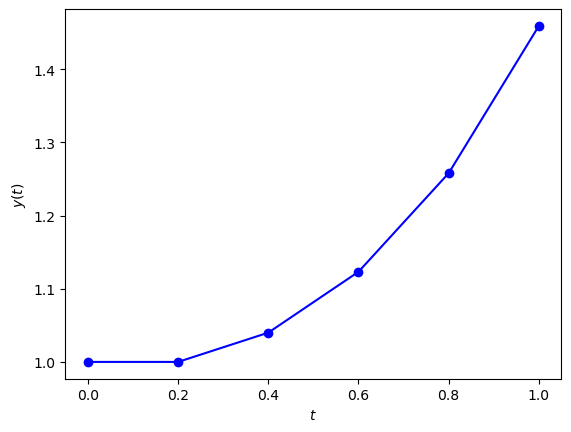

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Define Euler method function
def euler(f, tspan, y0, h):
    
    nsteps = int((tspan[1] - tspan[0]) / h)
    t = np.zeros(nsteps + 1)
    y = np.zeros(nsteps + 1)
    t[0] = tspan[0]
    y[0] = y0
    
    for n in range(nsteps):
        y[n+1] = y[n] + h * f(t[n], y[n])
        t[n+1] = t[n] + h

    return t, y


# Define the ODE function
def f(t, y):
    return t * y


# Define IVP parameters
tspan = [0, 1]  # boundaries of the t domain
y0 = 1          # initial value of the solution
h = 0.2         # step length

# Solve using the Euler method
t, y = euler(f, tspan, y0, h)

# Print table of solution values
print("|  t   |     y     | ")
print("|:----:|:---------:|")
for n in range(len(t)):
    print(f"| {t[n]:4.2f} | {y[n]:9.6f} |")

# Plot solution
fig, ax = plt.subplots()
plt.plot(t, y, "bo-", label="Euler")
plt.xlabel("$t$")
plt.ylabel("$y(t)$")
plt.show()

from myst_nb import glue
glue("euler_plot", fig, display=False)